# Artificial Neural Network

## Part 1 - Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import load_model
from pathlib import Path
import pickle

## Part 2 - Data Preprocessing

### Importing the dataset

In [2]:
#Access input folder
current_dir = Path.cwd()
parent_dir = current_dir.parent
input_dir1 = Path (parent_dir/"Pressure_profiles_arrival_omitted")
print ("input",input_dir1)

#Access folders inside input folder
input_dir2_train =  [folder_input for folder_input in input_dir1.iterdir() if folder_input.is_dir()]
print ("2",input_dir2_train)

input G:\Chamodi\Machine_Learning\Pressure_history_2\Pressure_profiles_arrival_omitted
2 [WindowsPath('G:/Chamodi/Machine_Learning/Pressure_history_2/Pressure_profiles_arrival_omitted/L13_1'), WindowsPath('G:/Chamodi/Machine_Learning/Pressure_history_2/Pressure_profiles_arrival_omitted/L13_11'), WindowsPath('G:/Chamodi/Machine_Learning/Pressure_history_2/Pressure_profiles_arrival_omitted/L13_13'), WindowsPath('G:/Chamodi/Machine_Learning/Pressure_history_2/Pressure_profiles_arrival_omitted/L13_15'), WindowsPath('G:/Chamodi/Machine_Learning/Pressure_history_2/Pressure_profiles_arrival_omitted/L13_17'), WindowsPath('G:/Chamodi/Machine_Learning/Pressure_history_2/Pressure_profiles_arrival_omitted/L13_19'), WindowsPath('G:/Chamodi/Machine_Learning/Pressure_history_2/Pressure_profiles_arrival_omitted/L13_21'), WindowsPath('G:/Chamodi/Machine_Learning/Pressure_history_2/Pressure_profiles_arrival_omitted/L13_23'), WindowsPath('G:/Chamodi/Machine_Learning/Pressure_history_2/Pressure_profiles_a

In [3]:
# Access each folder inside input folder
dataset_train = pd.DataFrame(columns = ['Charge_mass', 'Standoff_distance', 'Time', 'Pressure', 'Phase'])
df_list_train = []
for folder_train in input_dir2_train:
    
    # Make a list of data file names
    files_train = list(file_train for file_train in folder_train.rglob("*.xlsx") if 48 < int(file_train.stem[1:]) < 60)
    print ("folder", folder_train)
    
    for file_train in files_train:
        df_list_train.append(pd.read_excel(file_train))
        print (file_train.stem)

dataset_train = pd.concat(df_list_train, ignore_index = True)

folder G:\Chamodi\Machine_Learning\Pressure_history_2\Pressure_profiles_arrival_omitted\L13_1
P49
P53
P57
P59
folder G:\Chamodi\Machine_Learning\Pressure_history_2\Pressure_profiles_arrival_omitted\L13_11
P49
P53
P57
P59
folder G:\Chamodi\Machine_Learning\Pressure_history_2\Pressure_profiles_arrival_omitted\L13_13
P49
P53
P57
P59
folder G:\Chamodi\Machine_Learning\Pressure_history_2\Pressure_profiles_arrival_omitted\L13_15
P49
P53
P57
P59
folder G:\Chamodi\Machine_Learning\Pressure_history_2\Pressure_profiles_arrival_omitted\L13_17
P49
P53
P57
P59
folder G:\Chamodi\Machine_Learning\Pressure_history_2\Pressure_profiles_arrival_omitted\L13_19
P49
P53
P57
P59
folder G:\Chamodi\Machine_Learning\Pressure_history_2\Pressure_profiles_arrival_omitted\L13_21
P49
P53
P57
P59
folder G:\Chamodi\Machine_Learning\Pressure_history_2\Pressure_profiles_arrival_omitted\L13_23
P49
P53
P57
P59
folder G:\Chamodi\Machine_Learning\Pressure_history_2\Pressure_profiles_arrival_omitted\L13_25
P49
P53
P57
P59
fo

In [5]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572274 entries, 0 to 572273
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Charge_mass        572274 non-null  float64
 1   Standoff_distance  572274 non-null  int64  
 2   Time               572274 non-null  float64
 3   Pressure           572274 non-null  float64
 4   Phase              572274 non-null  object 
dtypes: float64(3), int64(1), object(1)
memory usage: 21.8+ MB


In [6]:
dataset_train = pd.get_dummies(dataset_train, columns =['Phase'], dtype = np.uint8)
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572274 entries, 0 to 572273
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Charge_mass        572274 non-null  float64
 1   Standoff_distance  572274 non-null  int64  
 2   Time               572274 non-null  float64
 3   Pressure           572274 non-null  float64
 4   Phase_negative     572274 non-null  uint8  
 5   Phase_positive     572274 non-null  uint8  
dtypes: float64(3), int64(1), uint8(2)
memory usage: 18.6 MB


In [7]:
dataset_train.head(30)

,Charge_mass,Standoff_distance,Time,Pressure,Phase_negative,Phase_positive
0,0.5,25,0.06871,103532.71094,0,1
1,0.5,25,0.06872,103514.87500,0,1
2,0.5,25,0.06873,103486.33594,0,1
3,0.5,25,0.06874,103491.25000,0,1
4,0.5,25,0.06875,103493.41406,0,1
5,0.5,25,0.06876,103481.47656,0,1
6,0.5,25,0.06877,103466.83594,0,1
7,0.5,25,0.06878,103465.41406,0,1
8,0.5,25,0.06879,103462.15625,0,1
9,0.5,25,0.06880,103447.83594,0,1


In [8]:
y = dataset_train['Pressure']
X = dataset_train.drop(['Pressure'], axis=1)
print(X.shape, y.shape)

(572274, 5) (572274,)


In [9]:
# convert to numpy array
X = np.array(X)
y = np.array(y)

### Splitting the dataset into the Training set and Test set

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.4,
                                                    random_state = 0)

In [11]:
X_val, X_test, y_val, y_test = train_test_split(X_test,
                                                y_test,
                                                test_size = 0.5,
                                                random_state = 0)

## Feature scaling

In [12]:
from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
X_train[:,0:3] = sc.transform(X_train[:, 0:3])
print (X_train)

[[ 0.72759919 -0.39498927 -0.59147231  1.          0.        ]
 [-1.01137468  1.16758985 -0.8311656   0.          1.        ]
 [ 0.82989177 -0.39498927 -0.75640348  1.          0.        ]
 ...
 [-0.70449694 -0.39498927 -0.88246209  1.          0.        ]
 [ 1.03447693 -0.39498927 -1.141945    0.          1.        ]
 [ 0.31842887  1.16758985  1.51592459  1.          0.        ]]


In [13]:
X_test[:,0:3] = sc.transform(X_test[:,0:3])
print (X_test)

[[ 1.34135467  0.64673014 -0.05856594  1.          0.        ]
 [ 1.03447693 -0.39498927 -1.37578103  0.          1.        ]
 [-0.80678952 -1.43670869  0.66857482  1.          0.        ]
 ...
 [ 0.42072145  1.16758985  0.20236695  1.          0.        ]
 [ 0.52301403 -0.39498927  0.8393638   1.          0.        ]
 [ 0.82989177 -0.39498927  0.39736429  1.          0.        ]]


In [14]:
X_val[:,0:3] = sc.transform(X_val[:,0:3])
print (X_val)

[[ 0.82989177  0.64673014  1.50639241  1.          0.        ]
 [-0.29532661 -0.39498927  0.53369837  1.          0.        ]
 [-0.60220436  1.16758985  1.50713188  1.          0.        ]
 ...
 [ 1.23906209 -1.43670869 -1.22770731  1.          0.        ]
 [ 1.03447693 -1.43670869 -1.5319091   1.          0.        ]
 [ 1.34135467  1.16758985  0.91119865  1.          0.        ]]


In [15]:
print ("X_train", len(X_train))
print ("X_test", len(X_test))
print ("X_val", len(X_val))

X_train 343364
X_test 114455
X_val 114455


## Part 3 - Building the ANN

### Initializing the ANN

In [17]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [18]:
ann.add(tf.keras.layers.Dense(units=175,
                              input_shape=(X_train.shape[1],),
                              activation='relu'))

### Adding the second hidden layer

In [19]:
ann.add(tf.keras.layers.Dense(units=150,
                              activation='relu'))

### Adding the third hidden layer

In [20]:
ann.add(tf.keras.layers.Dense(units=125,
                              activation='relu'))

### Adding the output layer

In [21]:
ann.add(tf.keras.layers.Dense(units=1,
                              activation='linear'))

### what model looks like

In [22]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 175)               1050      
                                                                 
 dense_1 (Dense)             (None, 150)               26400     
                                                                 
 dense_2 (Dense)             (None, 125)               18875     
                                                                 
 dense_3 (Dense)             (None, 1)                 126       
                                                                 
Total params: 46,451
Trainable params: 46,451
Non-trainable params: 0
_________________________________________________________________


## Part 4 - Training the ANN

### Compiling the ANN

In [23]:
# from tensorflow.keras.optimizers import Adam
from keras.optimizers import Adam
opt = Adam(learning_rate=0.001)
ann.compile(optimizer = opt,
            loss = 'mean_squared_error',
            metrics = ['mae'])

### early stopping callback

In [24]:
# protects from unnecessary further training of the model if a particular metric does not continue to improve over a number of n epochs. In such a case, the model training would be automatically aborted.
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=50,
                   restore_best_weights = True)

### Training the ANN model on the Training set

In [25]:
history = ann.fit(X_train, y_train,
                    validation_data = (X_val, y_val),
                    callbacks=[es],
                    epochs=500,
                    batch_size=50,
                    verbose=1)

Epoch 1/500
6868/6868 [==============================] - 26s 4ms/step - loss: 247035248.0000 - mae: 3746.3872 - val_loss: 359133.1875 - val_mae: 452.7115
Epoch 2/500
6868/6868 [==============================] - 26s 4ms/step - loss: 311316.5938 - mae: 407.4474 - val_loss: 282133.4062 - val_mae: 382.6269
Epoch 3/500
6868/6868 [==============================] - 27s 4ms/step - loss: 293028.7500 - mae: 386.4437 - val_loss: 350600.5625 - val_mae: 459.3069
Epoch 4/500
6868/6868 [==============================] - 27s 4ms/step - loss: 288591.4375 - mae: 381.1710 - val_loss: 293104.0938 - val_mae: 393.9047
Epoch 5/500
6868/6868 [==============================] - 27s 4ms/step - loss: 287745.5938 - mae: 379.6453 - val_loss: 268043.5000 - val_mae: 354.5150
Epoch 6/500
6868/6868 [==============================] - 27s 4ms/step - loss: 286773.4062 - mae: 378.7890 - val_loss: 271176.5000 - val_mae: 358.9351
Epoch 7/500
6868/6868 [==============================] - 28s 4ms/step - loss: 286256.1562 - mae:

### Analyse learn history

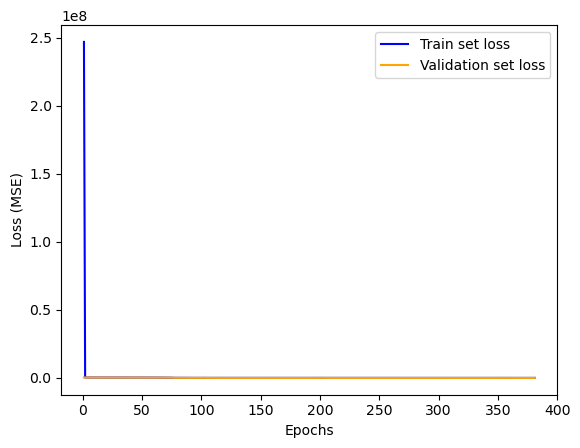

In [26]:
# let's see the training and validation accuracy by epoch
history_dict = history.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'blue', label='Train set loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation set loss')
#plt.title('Training and testing loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

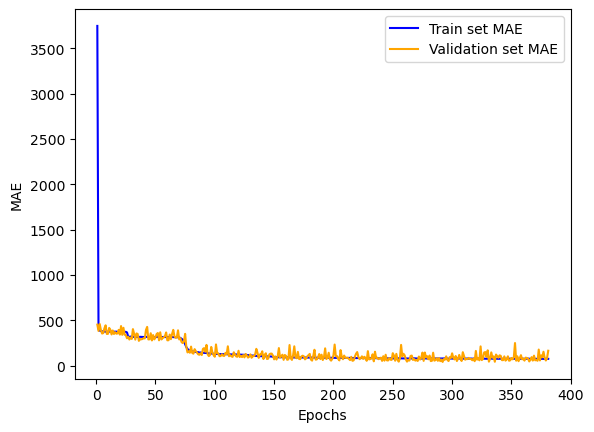

In [27]:
loss_values1 = history_dict['mae'] # you can change this
val_loss_values1 = history_dict['val_mae'] # you can also change this
epochs = range(1, len(loss_values1) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values1, 'blue', label='Train set MAE')
plt.plot(epochs, val_loss_values1, 'orange', label='Validation set MAE')
#plt.title('Training and testing MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [ ]:
print (epochs)

### Save the model

In [39]:
import pickle
pickle.dump(sc, open('scaler_ANN2.pkl', 'wb'))
ann.save('ANN_2.h5')

## Part 5 - Make predictions

In [4]:
ann = load_model('ANN_2.h5')
sc = pickle.load(open('scaler_ANN2.pkl', 'rb'))

3577/3577 [==============================] - 11s 3ms/step


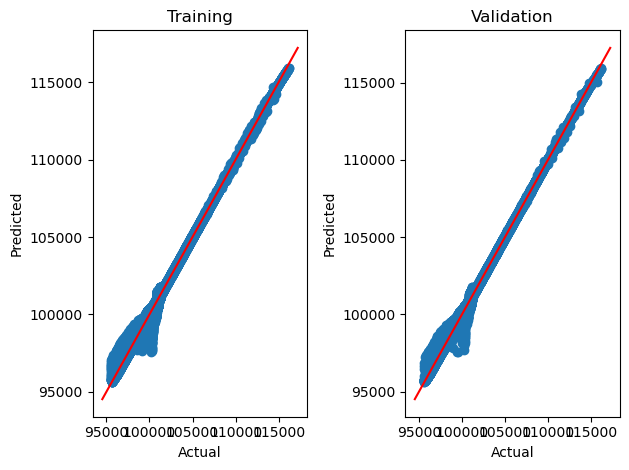

In [28]:
# scatterplot of actual vs. pred
# specify the dimensions 
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
axes[0].scatter(x=y_train, y=ann.predict(X_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_val, y=ann.predict(X_val)) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# show the plot
plt.show()

In [16]:
y_pred = ann.predict(X_test)
y_pred_e = y_pred/1000
y_test_e = y_test/1000
np.set_printoptions(precision=2)
print(np.concatenate((y_pred_e.reshape(len(y_pred_e),1), y_test_e.reshape(len(y_test_e),1)),1))

3577/3577 [==============================] - 6s 2ms/step
[[ 96.85  96.87]
 [104.22 104.2 ]
 [101.12 101.18]
 ...
 [ 97.42  97.41]
 [100.55 100.42]
 [100.34 100.37]]


Text(0, 0.5, 'Predicted data')

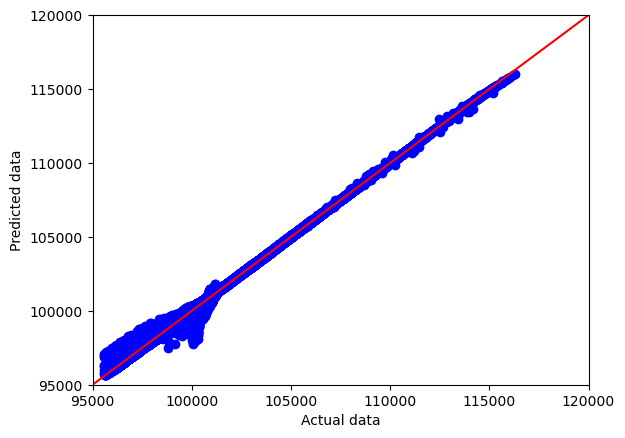

In [30]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, color="blue")
plt.plot ([95000,120000],[95000,120000], color = "red")
plt.axis ([95000,120000,95000,120000])
plt.xlabel ('Actual data')
plt.ylabel ('Predicted data')

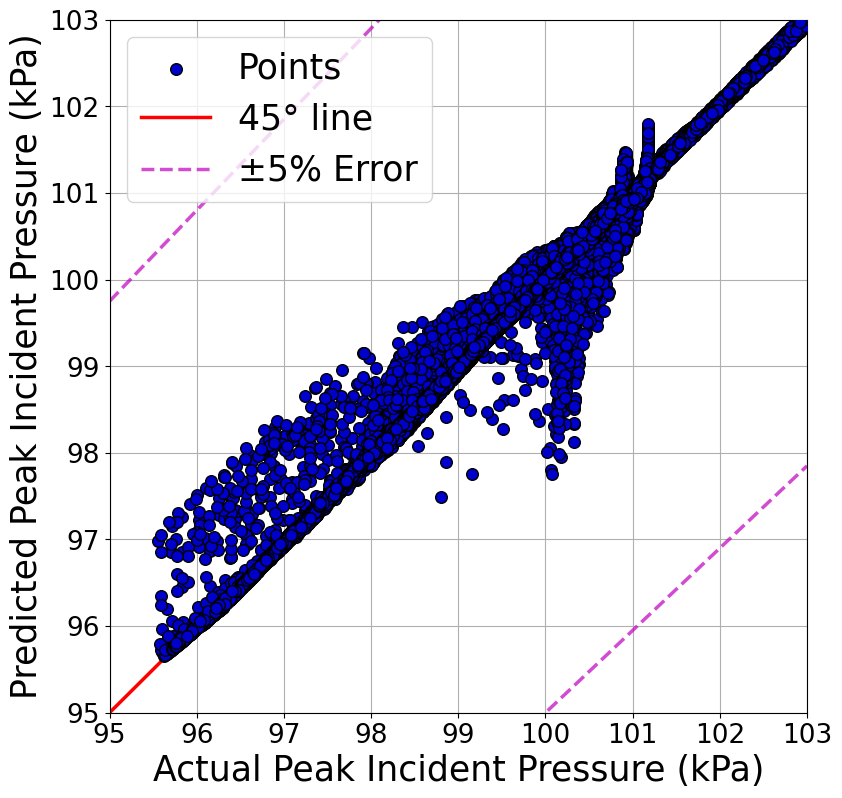

In [19]:
from sklearn.metrics import r2_score
# Initialize layout
fig1, ax1 = plt.subplots(figsize = (9, 9))
b_l = 95
u_l = 103

# Add scatterplot
ax1.scatter(y_test_e, y_pred_e, s=70, alpha=1, edgecolors="k",c='mediumblue',zorder=5, label = 'Points')


plt.ylabel('Predicted Peak Incident Pressure (kPa)',fontsize = 25)
plt.xlabel('Actual Peak Incident Pressure (kPa)',fontsize = 25)
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)


x1 = np.linspace(b_l, u_l)

plt.plot(x1, x1, 'Red', label='45\N{DEGREE SIGN} line',lw=2.5,alpha=1)
plt.plot(x1, 1.05*x1, '--m', label='\u00B15% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.95*x1,'m', linestyle='--',lw=2.5,alpha=0.7)
#plt.plot(x1, 1.1*x1, '-.g', label='\u00B110% Error',lw=2.5,alpha=0.7)
#plt.plot(x1, 0.9*x1,'-.g',lw=2.5,alpha=0.7)
#plt.plot(x1, 1.2*x1, color = '#F97306', linestyle='dotted', label='\u00B120% Error',lw=2.5,alpha=0.7)
#plt.plot(x1, 0.8*x1,color = '#F97306', linestyle='dotted', lw=2.5,alpha=0.7)

plt.ylim(b_l, u_l)
plt.xlim(b_l, u_l)
plt.legend(loc='upper left',fontsize = 25)

plt.grid()

ax1.spines['left'].set_color('black')        # setting up Y-axis tick color to red
ax1.spines['bottom'].set_color('black')         #setting up above X-axis tick color to red

#plt.savefig('plot1.png', dpi = 600, bbox_inches = 'tight')

In [32]:
# metrics
trainpreds = ann.predict(X_train)

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_train, trainpreds)) # train
print(mean_absolute_error(y_test, y_pred)) # test

10731/10731 [==============================] - 32s 3ms/step
44.28675859974547
44.45600604789218


In [33]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print (r2)

0.9987817484855601


In [34]:
r2_train = r2_score(y_train, trainpreds)
print (r2_train)

0.9988043557505394


In [35]:
count1 = 0
for i in range(len(y_pred)):
    line1 = y_pred[i] - 0.95*y_test[i]
    line2 = y_pred[i] - 1.05*y_test[i]
    #print ('line 1 ', line1)
    #print ('line 2 ', line2)
    mask1 = (line1 > 0) & (line2 < 0)
    #print (mask)
    count1 = np.sum(mask1+count1)
    #print (count)

count2 = 0
for j in range(len(y_pred)):
    line3 = y_pred[j] - 0.9*y_test[j]
    line4 = y_pred[j] - 1.1*y_test[j]
    mask2 = (line3 > 0) & (line4 < 0)
    count2 = np.sum(mask2+count2)


count3 = 0    
for k in range(len(y_pred)):
    line5 = y_pred[k] - 0.9*y_test[k]
    line6 = y_pred[k] - 1.1*y_test[k]
    mask3 = (line5 < 0) or (line6 > 0)
    count3 = np.sum(mask3+count3)
   

print ('Within 5% margin', format((count1/len (y_pred)),'.2%'))
print ('Within 10% margin', format((count2/len (y_pred)),'.2%'))
print ('Out of 10% margin', format((count3/len (y_pred)),'.2%'))

Within 5% margin 100.00%
Within 10% margin 100.00%
Out of 10% margin 0.00%


In [36]:
adj_r2 = 1 - ((1 - r2) * (len(X_test) - 1) / (len(X_test) - len (X_test[0]) - 1))
print (adj_r2)

0.9987816952630979


In [37]:
import math
from sklearn.metrics import mean_squared_error

math.sqrt(mean_squared_error(y_test, y_pred))

102.62479446216228

In [38]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)

44.45600604789218